In [1]:
import numpy as np
from keras.layers import Embedding
from keras.layers import SimpleRNN
from keras.layers import Dense
from keras.models import Sequential
from keras.preprocessing import sequence
from keras.datasets import imdb
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Using TensorFlow backend.


In [2]:
max_features = 10000
maxlen = 500
batch_size = 32

In [3]:
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (sample x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (sample x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [4]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

W0817 23:10:51.088762  9332 deprecation_wrapper.py:119] From C:\Users\serge\Anaconda3\envs\KerasEnv\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0817 23:10:51.142818  9332 deprecation_wrapper.py:119] From C:\Users\serge\Anaconda3\envs\KerasEnv\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0817 23:10:51.158864  9332 deprecation_wrapper.py:119] From C:\Users\serge\Anaconda3\envs\KerasEnv\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0817 23:10:51.308030  9332 deprecation_wrapper.py:119] From C:\Users\serge\Anaconda3\envs\KerasEnv\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0817 23:10:51.321033  9

In [5]:
history = model.fit(input_train,
                   y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)

W0817 23:10:51.587031  9332 deprecation_wrapper.py:119] From C:\Users\serge\Anaconda3\envs\KerasEnv\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.6412 - acc: 0.6160 - val_loss: 0.5270 - val_acc: 0.7498
Epoch 2/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.4399 - acc: 0.8102 - val_loss: 0.4244 - val_acc: 0.8146
Epoch 3/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.3290 - acc: 0.8654 - val_loss: 0.3384 - val_acc: 0.8586
Epoch 4/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.2536 - acc: 0.9026 - val_loss: 0.3866 - val_acc: 0.8392
Epoch 5/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.2073 - acc: 0.9233 - val_loss: 0.3752 - val_acc: 0.8686
Epoch 6/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.1602 - acc: 0.9420 - val_loss: 0.3682 - val_acc: 0.8690
Epoch 7/10
20000/20000 [==============================] - 26s 1ms/step - loss: 0.1155 - acc: 0.9601 - val_loss: 0.4459 - val_acc:

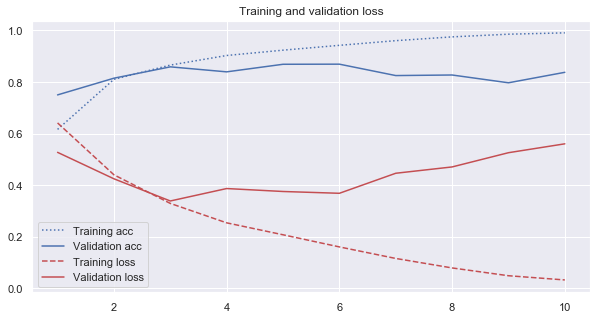

In [6]:
epoches = range(1, len(history.history['acc']) + 1)

plt.figure(figsize=(10,5))

plt.plot(epoches, history.history['acc'], 'b:', label='Training acc')
plt.plot(epoches, history.history['val_acc'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.plot(epoches, history.history['loss'], 'r--', label='Training loss')
plt.plot(epoches, history.history['val_loss'], 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend();